# Lineare Regression

Testdaten zwischen - lineares Beziehung - zwischen "page speed" und "amount purchased":

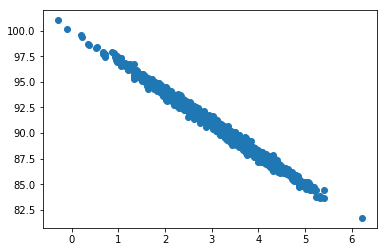

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3

scatter(pageSpeeds, purchaseAmount)

In [2]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)


R-squared:

In [4]:
r_value ** 2

0.9900207493396226

Steigung und Achsenabschnitt wird verwendet um vorhergesagte Werte zu beobachten:

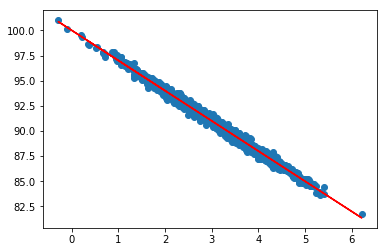

In [5]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(pageSpeeds)

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()

## !Challenge!

Versuche, die zufällige Variation in den Testdaten zu erhöhen, und errechne, welche Auswirkung diese auf den Fehlerwert r-squared hat.

























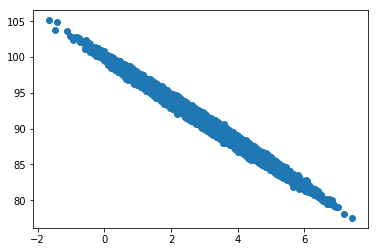

In [8]:
%matplotlib inline
import numpy as np
from pylab import *

pageSpeeds = np.random.normal(3.0, 1.0, 100000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 100000)) * 3

scatter(pageSpeeds, purchaseAmount)

In [9]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)


In [10]:
r_value ** 2

0.9901657733677133

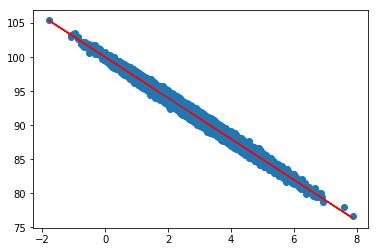

In [10]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(pageSpeeds)

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()

# Multivariate Regression

In [24]:
# Install
import sys
!conda install --yes --prefix {sys.prefix} xlrd
!conda install --yes --prefix {sys.prefix} statsmodels
!conda install --yes --prefix {sys.prefix} scikit-learn

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /home/ubuntu/miniconda3

  added / updated specs: 
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-learn-0.20.0        |   py37h4989274_1         5.7 MB

The following NEW packages will be INSTALLED:

    scikit-learn: 0.20.0-py37h4989274_1


scikit-learn-0.20.0  | 5.7 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [15]:
import pandas as pd

df = pd.read_excel('../Data/cars.xls')


In [16]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


Wir können Pandas verwenden, um diese Matrix in die Featurevektoren und den Wert, den wir vorherzusagen versuchen, aufzuteilen.

Marke und das Modell werden vermieden vermeiden; Regressionen funktionieren nicht gut mit Ordinalwerten, es sei denn diese können in eine numerische Reihenfolge umgewandelt werden.

In [25]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].as_matrix())

print (X)

est = sm.OLS(y, X).fit()

est.summary() # normalize mileage, cylinder, doors data
# cylinder is the most important coef, it has the highest weight

/home/ubuntu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ubuntu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


      Mileage  Cylinder     Doors
0   -1.417485  0.527410  0.556279
1   -1.305902  0.527410  0.556279
2   -0.810128  0.527410  0.556279
3   -0.426058  0.527410  0.556279
4    0.000008  0.527410  0.556279
5    0.293493  0.527410  0.556279
6    0.335001  0.527410  0.556279
7    0.382369  0.527410  0.556279
8    0.511409  0.527410  0.556279
9    0.914768  0.527410  0.556279
10  -1.171368  0.527410  0.556279
11  -0.581834  0.527410  0.556279
12  -0.390532  0.527410  0.556279
13  -0.003899  0.527410  0.556279
14   0.430591  0.527410  0.556279
15   0.480156  0.527410  0.556279
16   0.509822  0.527410  0.556279
17   0.757160  0.527410  0.556279
18   1.594886  0.527410  0.556279
19   1.810849  0.527410  0.556279
20  -1.326046  0.527410  0.556279
21  -1.129860  0.527410  0.556279
22  -0.667658  0.527410  0.556279
23  -0.405792  0.527410  0.556279
24  -0.112796  0.527410  0.556279
25  -0.044552  0.527410  0.556279
26   0.190700  0.527410  0.556279
27   0.337442  0.527410  0.556279
28   0.566102 

/home/ubuntu/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     18.11
Date:                Fri, 19 Oct 2018   Prob (F-statistic):           2.23e-11
Time:                        11:03:52   Log-Likelihood:                -9207.1
No. Observations:                 804   AIC:                         1.842e+04
Df Residuals:                     801   BIC:                         1.843e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
Cylinder    5587.4472    804.509      6.945      0.000    4008.252    7166.642
Doors      -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Die Tabelle der obigen Koeffizienten gibt uns die Werte, die man in eine Gleichung der Form einfügt:
    B0 + B1 * Mileage + B2 * model_ord + B3 * doors
    
In diesem Beispiel ist es ziemlich klar, dass die Anzahl der Zylinder wichtiger ist als alle anderen Werte, welche auf den Koeffizienten weniger Auswirkungen haben.

In [7]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

Überraschenderweise bedeutet mehr Türen keinen höheren Preis! (Vielleicht bedeutet es in einigen Fällen einen Sportwagen?) Es ist also nicht verwunderlich, dass es als Vorhersage hier ziemlich nutzlos ist. Dies ist jedoch ein sehr kleiner Datensatz, daher können wir nicht viel Bedeutung herauslesen.

# Polynomiale Regression

Was ist, wenn meine Daten überhaupt nicht linear sind/aussehen?

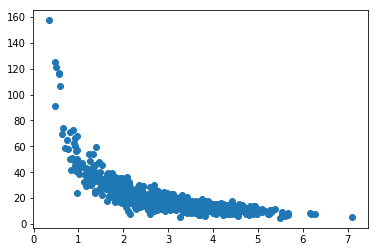

In [2]:
%matplotlib inline
from pylab import *
import numpy as np

np.random.seed(2) # random seed value
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

polyfit Funktion: Polynomiales Modell unserer Daten, das den quadratischen Fehler minimiert

In [3]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4)) # 4th degree polynomial


Wir visualisieren unser ursprüngliches Streudiagramm zusammen mit einem Diagramm unserer vorhergesagten Werte unter Verwendung des Polynoms für Seitengeschwindigkeitszeiten von 0-7 Sekunden:

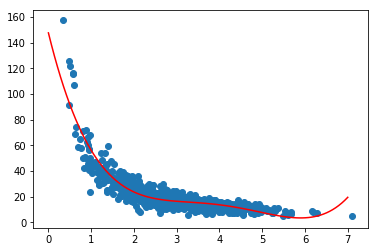

In [4]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [29]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)


0.8293766396303073


## !Challenge!

Probiere verschiedene Polynomordnungen aus. Kann das Modell bei höherem "purchase Amount" besser passen? Fängst du an, Überanpassungen zu sehen, obwohl das R-Quadrat-Ergebnis für diesen bestimmten Datensatz gut aussieht?

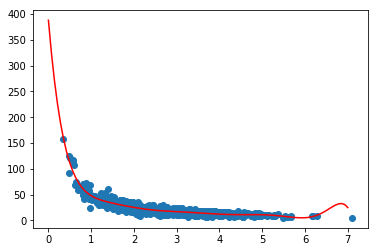

In [37]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 10)) # 10 degrees


import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [38]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)

0.8832172356257323


# Train / Test

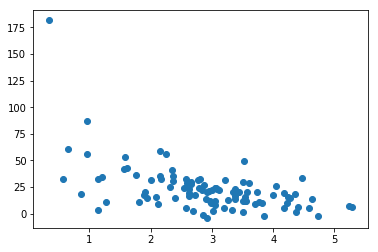

In [39]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds


scatter(pageSpeeds, purchaseAmount)

Jetzt teilen wir die Daten in zwei Teile auf - 80% davon werden für das "Training" unseres Modells und die anderen 20% für das Testen verwendet. Auf diese Weise können wir Überanpassungen vermeiden.

In [40]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]
# data has to be randomly shuffled before split up! Here the data is anyhow random

Trainingsdatensatz:

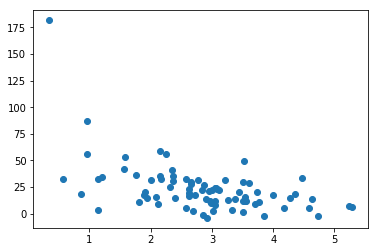

In [41]:
scatter(trainX, trainY)

Testdatensatz:

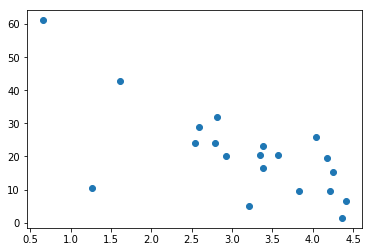

In [42]:
scatter(testX, testY)

In [44]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 8)) #  8th-degree polynomial

Trainingsdatensatz

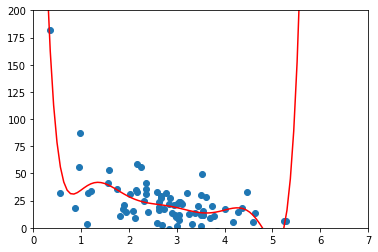

In [45]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()


Test-Daten

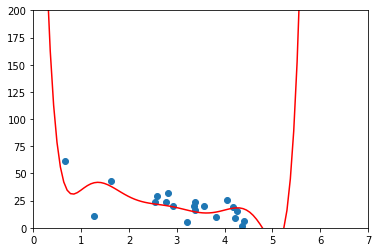

In [46]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [47]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))

print(r2)


0.300181686118287


In [48]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print(r2)

0.6427069514692513


Notiz: scikit-learn verfügt über integrierte train_test_split-Funktionen

## !Challenge!

Versuche den Fehler in den Testdaten mit Hilfe von Polynomen mit unterschiedlichem Grad zu messen. Welcher Grad funktioniert am besten?

In [10]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 3))

from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print(r2)

0.4295783201206691


# K-Means Clustering

Personen nach Einkommen und Alter gruppiert:

In [49]:
from numpy import random, array

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    random.seed(10)
    pointsPerCluster = float(N)/k
    X = []
    for i in range (k):
        incomeCentroid = random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([random.normal(incomeCentroid, 10000.0), random.normal(ageCentroid, 2.0)])
    X = array(X)
    return X

K-Means:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


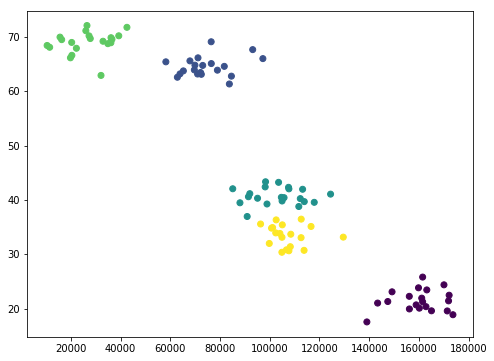

In [51]:
%matplotlib inline

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float

data = createClusteredData(100, 5) # 100 people among 5 clusters

model = KMeans(n_clusters=5)

# Scaling of the data to normalize it! Important for good results.
model = model.fit(scale(data))

# We can look at the clusters each data point was assigned to
print(model.labels_)

plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
plt.show()

## !Challenge!

Was passiert, wenn du die Daten nicht skalierst? Was passiert, wenn du andere Werte von K wählst? In der realen Welt wirst du nicht den "richtigen" Wert von K kennen.

[2 9 2 2 2 2 9 2 9 2 9 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 8 8 3 3 8 3 8 3 3 3 3
 3 3 8 7 7 7 4 7 4 7 4 7 7 7 7 4 7 4 7 7 7 7 6 5 5 5 1 1 1 5 5 1 1 5 1 5 5
 5 1 1 5 5 5 0 6 0 6 0 6 6 0 6 6 6 0 6 0 0 6 6 6 0 0]


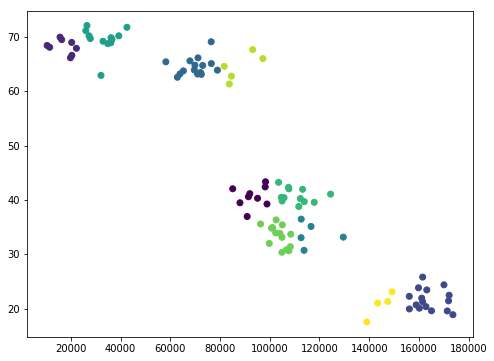

In [52]:

model = KMeans(n_clusters=10)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(scale(data))

# We can look at the clusters each data point was assigned to
print(model.labels_)

# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
plt.show()

# Naive Bayes

Wir "cheaten" mit sklearn.naive_bayes, um einen Spam-Klassifikator zu trainieren!

In [79]:
import os
import io
import numpy
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

def readFiles(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root, filename)

            inBody = False
            lines = []
            f = io.open(path, 'r', encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield path, message


def dataFrameFromDirectory(path, classification):
    rows = []
    index = []
    for filename, message in readFiles(path):
        rows.append({'message': message, 'class': classification})
        index.append(filename)

    return DataFrame(rows, index=index)

data = DataFrame({'message': [], 'class': []})

data = data.append(dataFrameFromDirectory('../Data/emails/spam', 'spam'))
data = data.append(dataFrameFromDirectory('../Data/emails/ham', 'ham'))


/home/ubuntu/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Let's have a look at that DataFrame:

In [80]:
data.head()

,class,message
../Data/emails/spam/00304.ed5fbfc3e6f2be662f29f43f172a1fb3,spam,\n\n<HTML><TABLE WIDTH=100% BORDER=0 CELLPADDI...
../Data/emails/spam/00109.eda1664dd3b3c31b67e5cd04553b6546,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
../Data/emails/spam/00163.244a217b150d2129cbdc52b96d992382,spam,We guarantee you signups before you ever pay\n...
../Data/emails/spam/00400.cc74b7994a7282f32ee2a3b7e3634d31,spam,Our delightful garden ornaments combine the fi...
../Data/emails/spam/00224.0654fe0af51e1dcefa0eb66eb932f55f,spam,"Dear sir,,\n\n\n\n\n\nMy name is DR Steven M D..."


Jetzt werden wir einen CountVectorizer verwenden, um jede Nachricht in ihre Wortliste aufzuteilen und diese in einen MultinomialNB-Klassifikator zu werfen. Call fit () und wir haben einen geschulten Spam-Filter bereit zu gehen!

In [81]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(data['message'].values)

classifier = MultinomialNB()
targets = data['class'].values
classifier.fit(counts, targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [82]:
examples = ['Free Viagra now!!!', "Hi Bob, how about a game of golf tomorrow?"]
example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

array(['spam', 'ham'], dtype='<U4')

## !Challenge!

In [83]:
examples = ['Holiday', "test"]
example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

array(['ham', 'ham'], dtype='<U4')

# Entscheidungsbäume

First we'll load some fake data on past hires I made up. Note how we use pandas to convert a csv file into a DataFrame:

In [84]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "../Data/PastHires.csv"
df = pd.read_csv(input_file, header = 0)

In [85]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


scikit-learn benötigt numerische Werte, damit Entscheidungsbäume funktionieren. Also werden wir Y, N auf 1,0 und Bildungsstufen auf einer Skala von 0-2 abbilden.

In [86]:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


Als Nächstes müssen wir die Features von der Zielspalte trennen, für die wir einen Entscheidungsbaum erstellen möchten.

In [88]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [89]:
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

Beachte, dass du pydotplus installiert haben musst, damit dies funktioniert. (! pip install pydotplus)

Um diesen Entscheidungsbaum zu lesen, verzweigt jede Bedingung links nach "wahr" und rechts nach "falsch". Wenn diese bei einem Wert enden, stellt das Werte-Array dar, wie viele Beispiele in jedem Zielwert vorhanden sind. Also Wert = [0. 5.] bedeutet, dass es bis zum Erreichen des Punktes 0 "keine Einstellungen" und 5 "Einstellungen" gibt. Wert = [3. 0.] bedeutet 3 Nicht-Hires und 0 Hires.

Fontconfig warning: ignoring C.UTF-8: not a valid language tag



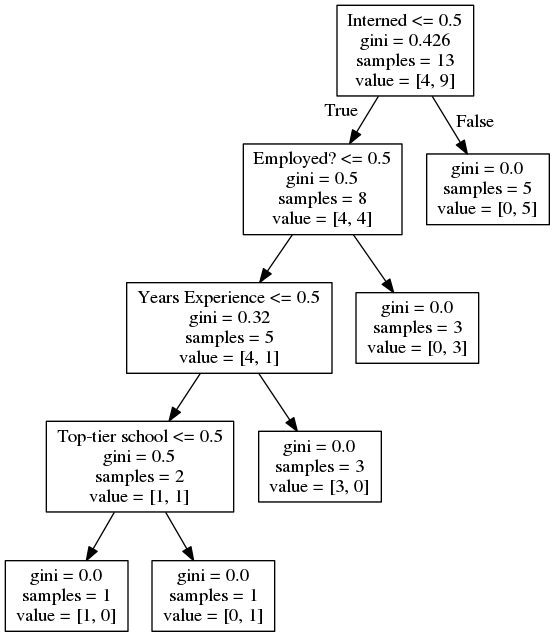

In [17]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  